In [26]:
#importing dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [16]:
liquor_sales_df = pd.read_csv('Resources/weekly_sales.csv')
liquor_sales_df.head()

,Item,Item Code,Quantity,Unit Price,Total Sales Amount,date
0,RAIL Vodka,3339,46.0,4.826087,222.0,2019-02-15
1,PINT LKFT IPA,3136,44.0,3.579545,157.5,2019-02-15
2,SHOT Tullamore Dew,3327,38.0,4.000000,152.0,2019-02-15
3,PINT Spotted Cow,3140,36.0,3.750000,135.0,2019-02-15
4,PINT Miller High Life,3137,30.0,3.000000,90.0,2019-02-15


In [17]:
liquor_sales_df.Item.value_counts(normalize=True)

BTL Miller Lite         0.009240
BTL Bud Light           0.008662
PINT Stein              0.008085
SHOT Tullamore Dew      0.008085
CAN PBR 16oz            0.008085
                          ...   
LSF LITE                0.000064
Mount Royal Light       0.000064
SHOT Chopin             0.000064
LSF Beer of the Week    0.000064
SHOT Ballyhoo           0.000064
Name: Item, Length: 433, dtype: float64

In [18]:
liquor_sales_df.dtypes

Item                   object
Item Code               int64
Quantity              float64
Unit Price            float64
Total Sales Amount    float64
date                   object
dtype: object

In [20]:
liquor_sales_df['date'] = pd.to_datetime(liquor_sales_df['date'])
liquor_sales_df.dtypes

Item                          object
Item Code                      int64
Quantity                     float64
Unit Price                   float64
Total Sales Amount           float64
date                  datetime64[ns]
dtype: object

In [25]:
liquor_total_weekly_sales = liquor_sales_df.groupby(['date']).sum(['Quantity', 'Total Sales Amount'])
liquor_total_weekly_sales.drop(['Item Code', 'Unit Price'], inplace=True, axis=1)
liquor_total_weekly_sales.head()

,Quantity,Total Sales Amount
date,,
2019-02-15,569.0,2455.25
2019-02-22,1277.0,5790.00
2019-03-01,1541.0,6587.25
2019-03-08,1496.0,6543.50
2019-03-15,1551.0,6834.75


In [33]:
liquor_total_weekly_sales.iloc[:,0]

date
2019-02-15     569.0
2019-02-22    1277.0
2019-03-01    1541.0
2019-03-08    1496.0
2019-03-15    1551.0
               ...  
2021-08-20    1872.0
2021-08-27    1543.0
2021-09-03    1626.0
2021-09-10    1741.0
2021-09-17    1543.0
Name: Quantity, Length: 127, dtype: float64

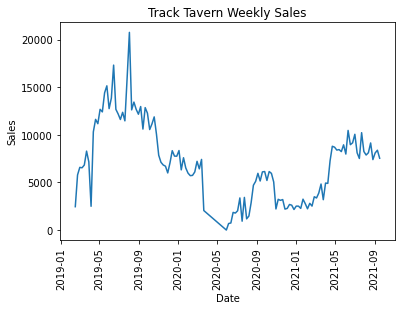

In [36]:
plt.plot(liquor_total_weekly_sales.index, liquor_total_weekly_sales['Total Sales Amount'])

# Create labels for the X and Y axis
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title('Track Tavern Weekly Sales')
plt.xticks(rotation=90)

# Save and display the chart
#plt.savefig("")
plt.show()